## California Housing Data (1990)

California census data in 1990. 

Task: Build a model of housing prices in the state

https://www.kaggle.com/harrywang/housing

Note: you should only analyze the training data as the testing data is unseen to you. 

In [2]:
import pandas as pd

# create a dataframe from the csv file
housing = pd.read_csv("../data/housing.csv")

# show the first five rows of the data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Show a concise summary of a dataframe using the function `info`. We can see the feature **total_bedrooms** has NaN values. We will talk about how to handling missing values in the next notebook. 

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In addition, the feature **ocean_proximity** is a text and categorical feature. We can check the counts of its unique values using the function `value_counts`. We can see there are five unique values for this feature.

In [13]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

We can check the descriptive statistic of the dataframe. The statistic values excludes the NaN values in the dataframe. For example, the count of feature **total_bedrooms** is 20433, which is less than 20604 as this feature has NaN values. 

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Visualise the data
We can make a histogram of the dataframe by using the function `hist`. The parameter `bins` refers to the number of values on the x-axis of the histograms. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9f0a4c940>,
      dtype=object)

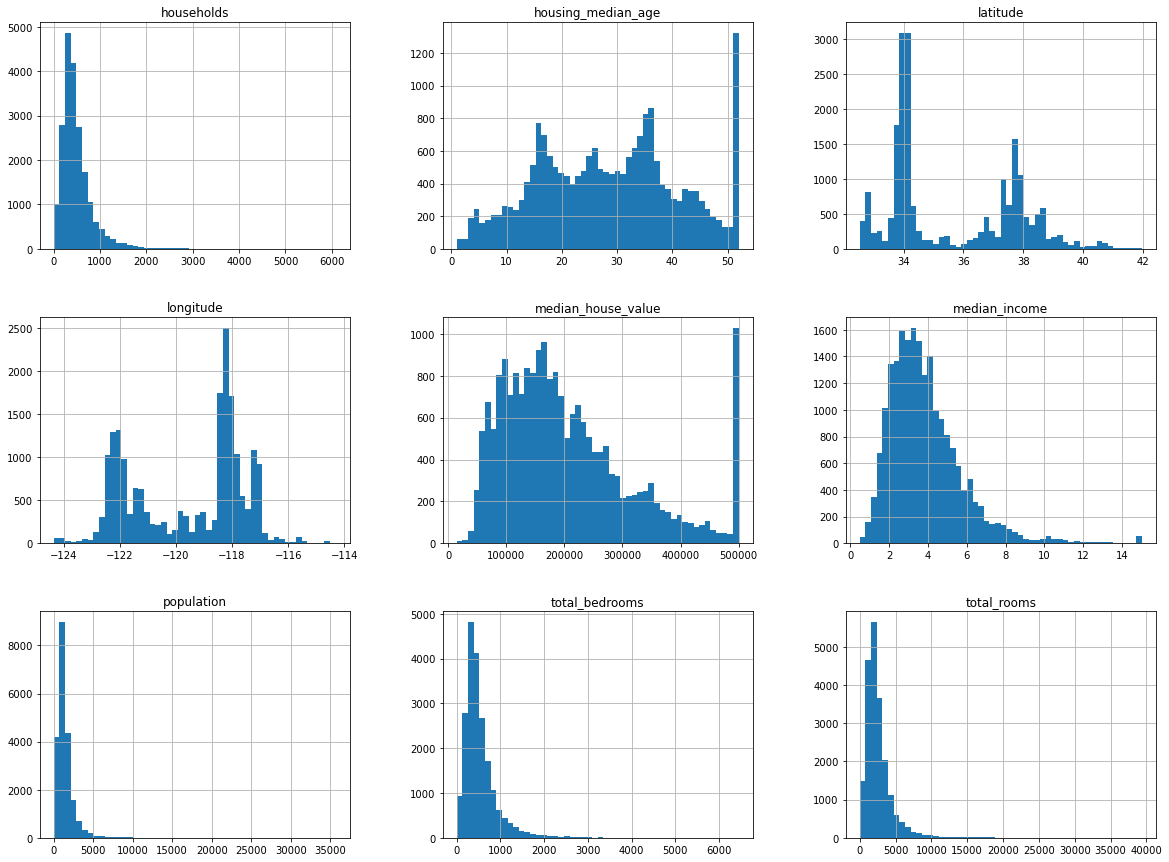

In [15]:
housing.hist(bins=50, figsize=(20,15))

The plot reveals a few things:
1. The feature **median_house_value** is capped at 500000 -- houses with prices >500000 are capped to have price 500000. This can be a problem as your machine learning algorithm might learn from the data that the housing prices can never be more than 500000. To solve the problem, you have two options:
    1. collect proper labels for the capped data
    2. remove the capped data from the dataset
2. Features have very different scales. We will talk about feature scaling in the notebook prepare_data.
3. Many histograms are tail-heavy: they extend much farther to the right of the median than to the left. This may be problematic for some machine learning algorithm. We can try transforming these features to have more bell-shaped distributions, such as taking logarithm of the data. 

### Visualise geographical data

Since the dataset has geographical data, we can check the correlation between the label feature and the locations by visualising the following plot. We show the locations of the houses and use the colours to indicate the price of the houses -- warmer colours mean higher prices. We can see there are some high-density areas. 

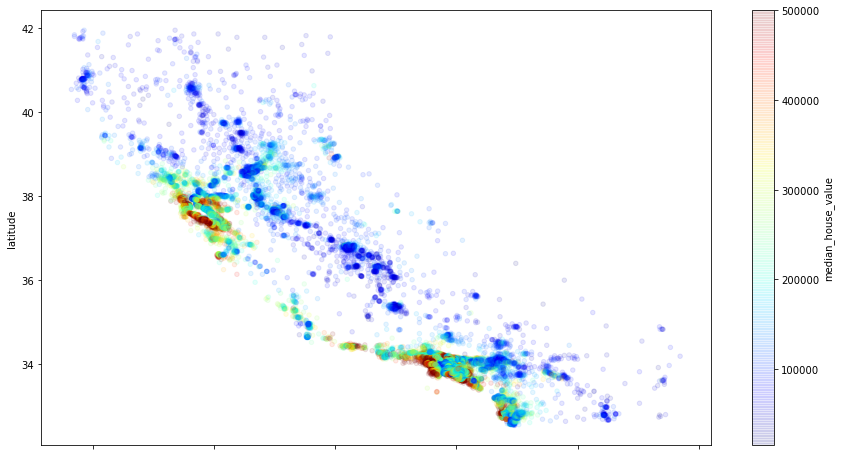

In [3]:
import matplotlib.pyplot as plt

housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(15, 8), alpha=0.1,
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

### Data correlations

We can check the correlation between all pairs of feature by calling function `corr`. The correlation coefficient ranges from -1 to 1. When it is close to 1, it means that there is a strong positive correlation, while when it is close to -1, it means there is a strong negative correlation. When the coefficient is close to 0, there is no correlation. 

In [17]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Since we are interested in which features are correlated to the label feature, we take out the correlation values between the features and the label feature, and sort them by a descending order. It shows the feature **media_income** is the most correlated feature. 

In [18]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Another way to check for correlation between features is to use the `scatter_matrix` function, which plots every numerical feature against every other numerical feature. Since there are too many features, we focus on a few promising features that seem most correlated with the label feature.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9f0a4c0a0>,
      dtype=object)

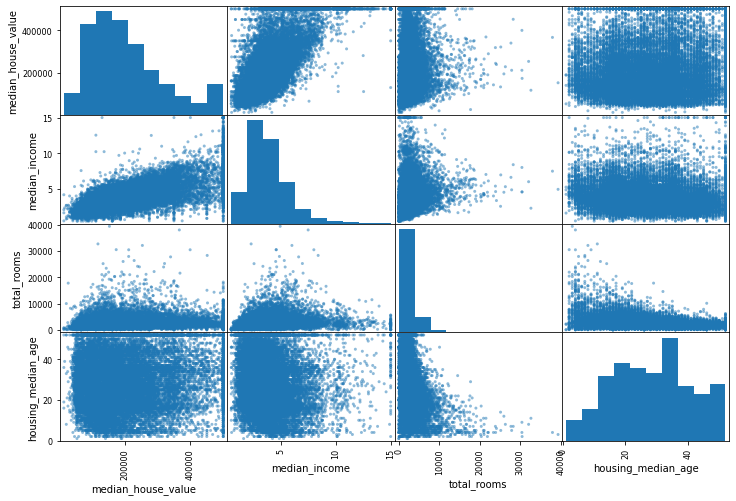

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

The most promising feature is `median_income`, so let's have a closer look at its correlation scatterplot with the label feature. 

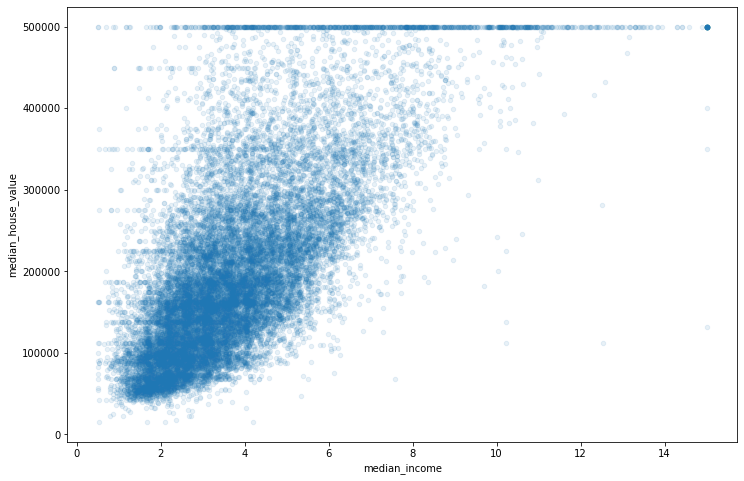

In [20]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
            alpha=0.1, figsize=(12,8))

The plot reveals that there is a positive correlation. In addition, except the price cap which is clearly visible as a horizontal line at 500000, there are a few other less obvious horizontal lines. It means there are other price caps in the data. 

### Feature combinations

We can try out feature combinations. For example, the total number of rooms in a district is not very useful if you don't know how many households there are. What we want is actually the number of rooms per household. We can then create a new feature **rooms_per_household**. For the similar reason, we create the other two features **bedrooms_per_room** and **population_per_household**. 

In [21]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

By checking the correlation of the features with the label feature, we can see the new combined features are more correlated with the label feature compuaring with the original features. 

In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64